In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_csv_columns_with_max(filepath):
    """Opens a CSV, plots all columns vs. index, displays max values 
       (ignoring NaNs) in legend, and returns a list of 
       (column_name, max_value) tuples.
    """
    try:
        df = pd.read_csv(filepath)

        num_columns = len(df.columns)
        fig, axes = plt.subplots(nrows=num_columns, figsize=(8, num_columns * 2), sharex=True)

        if num_columns == 1:
            axes = [axes]

        max_values = []

        for i, column_name in enumerate(df.columns):
            data = df[column_name].values

            max_value = np.nanmax(data)  # Calculate max, ignoring NaNs
            max_index = np.nanargmax(data) # Calculate max index, ignoring NaNs
            max_values.append((column_name, max_value))

            axes[i].plot(df.index, data,  # Plot all the data (including NaNs)
                         label=f"{column_name} (Max: {max_value:.2f} at index {max_index})")
            axes[i].set_ylabel(column_name)
            axes[i].set_xlabel("Index")
            axes[i].legend()

        plt.suptitle("Columns vs. Index")
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()

        return max_values

    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: CSV file is empty: {filepath}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage (same as before)

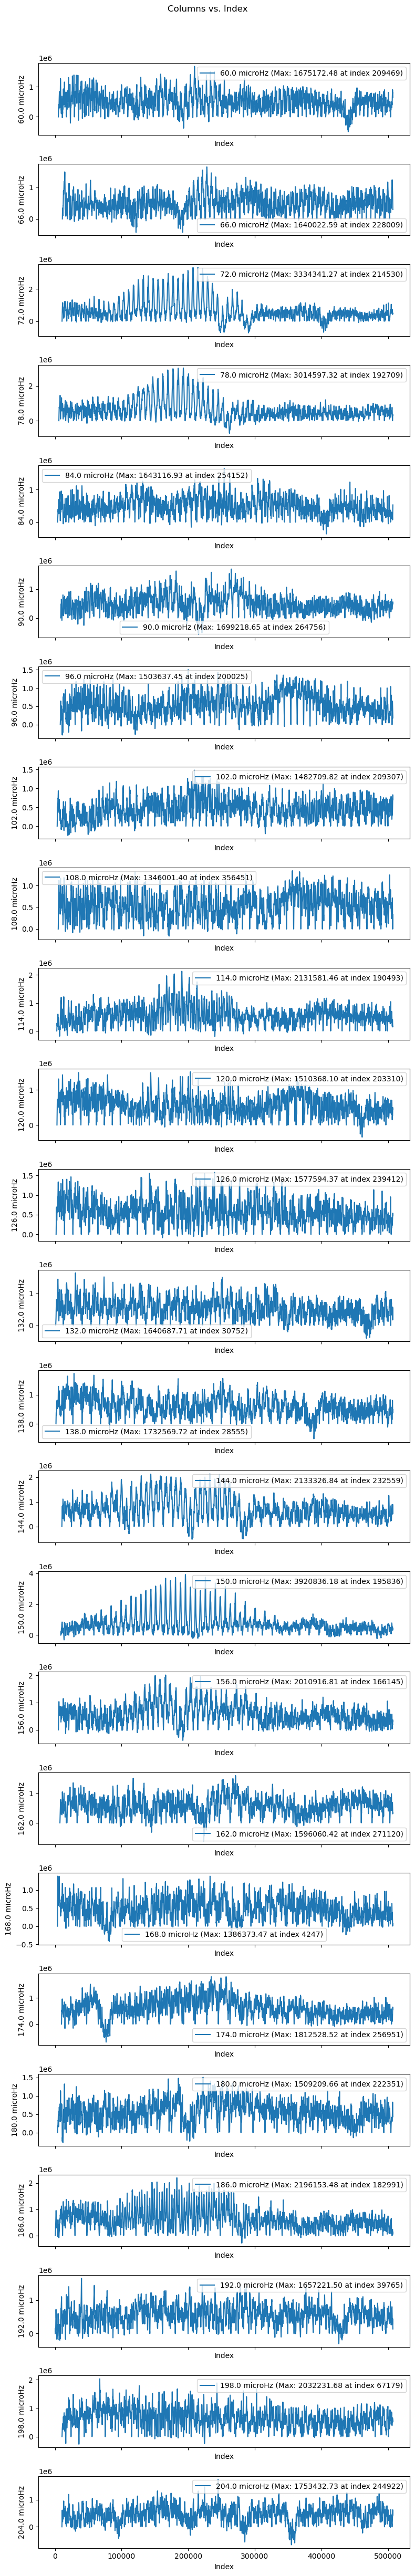

[('60.0 microHz', 1675172.4834871814), ('66.0 microHz', 1640022.5913183205), ('72.0 microHz', 3334341.2706625424), ('78.0 microHz', 3014597.3229959942), ('84.0 microHz', 1643116.934465133), ('90.0 microHz', 1699218.6542928182), ('96.0 microHz', 1503637.4483832568), ('102.0 microHz', 1482709.8184947), ('108.0 microHz', 1346001.3952799588), ('114.0 microHz', 2131581.458834335), ('120.0 microHz', 1510368.1013101712), ('126.0 microHz', 1577594.3718071692), ('132.0 microHz', 1640687.7073780447), ('138.0 microHz', 1732569.7213542052), ('144.0 microHz', 2133326.836427126), ('150.0 microHz', 3920836.17716616), ('156.0 microHz', 2010916.814943191), ('162.0 microHz', 1596060.4157373195), ('168.0 microHz', 1386373.465854466), ('174.0 microHz', 1812528.5175070912), ('180.0 microHz', 1509209.658037834), ('186.0 microHz', 2196153.4789095894), ('192.0 microHz', 1657221.4956020229), ('198.0 microHz', 2032231.684355296), ('204.0 microHz', 1753432.7289353537)]


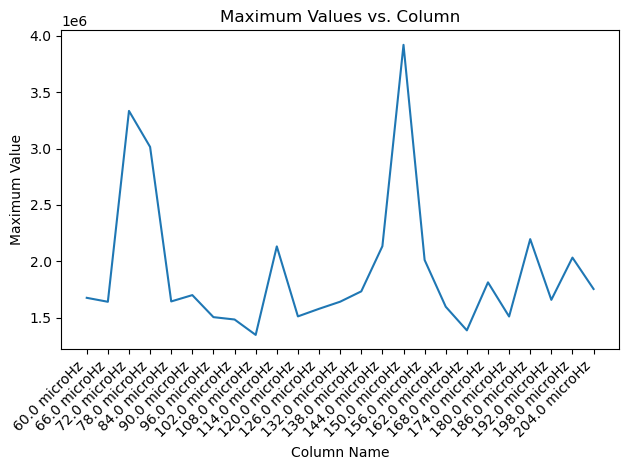

In [6]:
# Example usage:
filepath = "combinedFilteredData.csv"  # Replace with your CSV file path
max_values_list = plot_csv_columns_with_max(filepath)

if max_values_list:  # Check if the list is not None (i.e., no error occurred)
    print(max_values_list)

    # Plot max values (example) - assuming you want to plot max values vs. column index:
    column_names, max_values = zip(*max_values_list)
    plt.plot(column_names, max_values)
    plt.xlabel("Column Name")
    plt.ylabel("Maximum Value")
    plt.title("Maximum Values vs. Column")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability if needed
    plt.tight_layout()
    plt.show()